In [1]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import json

### Assignment 1-1 Random Walk Simulation in D dimensions

In [2]:
### Functions
def dice():
    return np.random.uniform() > 0.5

def f(x):
    for i in range(len(x)):
        x[i] = x[i]+1 if dice() else x[i]-1
    return x

In [3]:
def half(x):
    if x[0] > 0:
        return 1
    elif x[0] == 0:
        return 0
    return -1

def quardrant(x):
    sec = half(x)
    if sec == 0 or x[1] == 0: return 0
    if sec == 1:
        if x[1] > 0:
            return 1
        else:
            return 4
    else:
        if x[1] > 0:
            return 2
        else:
            return 3
        
def octant(x):
    sec = quardrant(x)
    if sec == 0 or x[2] == 0: return 0
    if(x[2] > 0):
        return sec
    else:
        return sec+4

def sedecimant(x):
    sec = octant(x)
    if sec == 0 or x[3] == 0: return 0
    if(x[3] > 0):
        return sec
    else:
        return sec+8

In [4]:
### Record
# 1. Record the times of the point back to 0 (and mark the time)
# 2. Record the quardrant (or octant) of the point in each step
# 3. Record the distance from the origin to the point in each step

def select_fn(dim:int):
    if dim == 1:
        return half
    elif dim == 2:
        return quardrant
    elif dim == 3:
        return octant
    elif dim > 3:
        return sedecimant
    else: raise ValueError("Invalid dimension")

def record(x, fn):
    section = fn(x)

    return {
        "section": int(section),
        "is_zero": np.all(x == 0),
    }

    

In [5]:
def test(d:int, steps:int, fn):
    recorder = {
        "back_to_zero": [],
        "section": []
    }
    x = np.zeros(int(d))
    # REPEAT
    for step in range(int(steps)):
        x = f(x)
        rec = record(x, fn)
        if rec["is_zero"]:
            recorder["back_to_zero"].append(step+1)
        recorder["section"].append(rec["section"])
    recorder["last_x"] = x
    return recorder

In [6]:
# According to the recorder to plot the graph
def back_to_zero_count(records, dim:int, walks:int):
    count = [len(r["back_to_zero"]) for r in records]
    ## Probability Density Function
    plt.hist(count, bins=100, density=True, alpha=0.8, color='g')
    plt.xlabel('Times')
    plt.ylabel('Probability')
    plt.title('Probability Density Function (Back to Origin)')
    plt.savefig(f"dim-{dim}_walks-{walks}_origin.png")
    plt.show()
    return None

def distance_plot(records, tpe:str, dim:int, walks:int):
    last_x_dist = []
    for record in records:
        if tpe == "l1":
            last_x_dist.append(np.linalg.norm(record["last_x"], ord=1))
        elif tpe == "l2":
            last_x_dist.append(np.linalg.norm(record["last_x"], ord=2))
        else:
            raise ValueError("Invalid type")
    
    ## Probability Density Function
    plt.hist(last_x_dist, bins=100, density=True, rwidth=0.5, alpha=0.6, color='g')
    plt.xlabel('Distance')
    plt.ylabel('Probability')   
    plt.title(f'Probability Density Function ({tpe})')
    plt.savefig(f"dim-{dim}_walks-{walks}_{tpe}.png")
    plt.show()
    
    return None

In [7]:
## Params
Dimension = [1, 2, 3, 4]
steps = 1000
walks = [10**2, 10**3, 10**4, 10**5, 10**6]
num_workers = mp.cpu_count()

In [8]:
def worker_task(args):
    return test(*args)

In [11]:
## Main Test
def main():
    for d in Dimension:
        fn = select_fn(d)
        for walk_count in walks:
            print(f"Dimension = {d}, n = {walk_count}")
            ## Parallel Computing
            with mp.Pool(num_workers) as pool:
                records = []
                for res in pool.imap_unordered(worker_task, [(d, steps, fn) for _ in range(walk_count)]):
                    records.append(res)
            ## Plot
            distance_plot(records, "l1", d, walk_count)
            distance_plot(records, "l2", d, walk_count)
            back_to_zero_count(records, d, walk_count)
            ## Save the records
            with open(f"dim-{d}_walks-{walk_count}.jsonl", "w") as f:
                for record in records:
                    record["last_x"] = record["last_x"].tolist()
                    f.write(json.dumps(record) + "\n")
    return None

Dimension = 1, n = 100


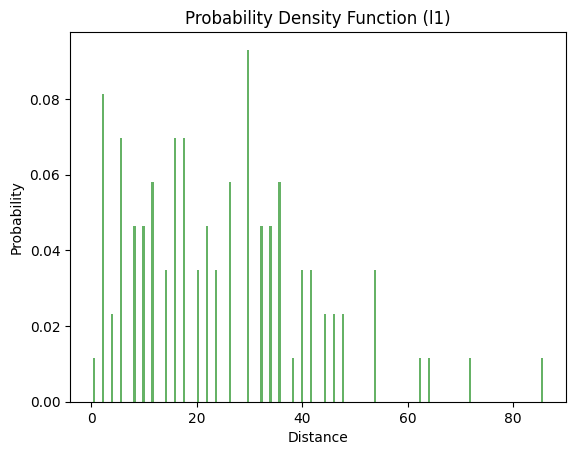

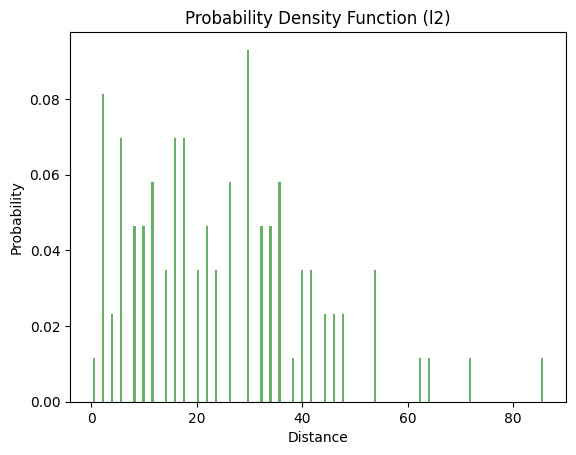

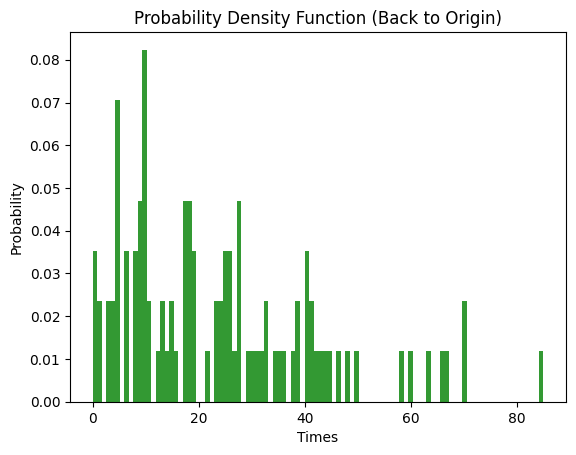

Dimension = 1, n = 1000


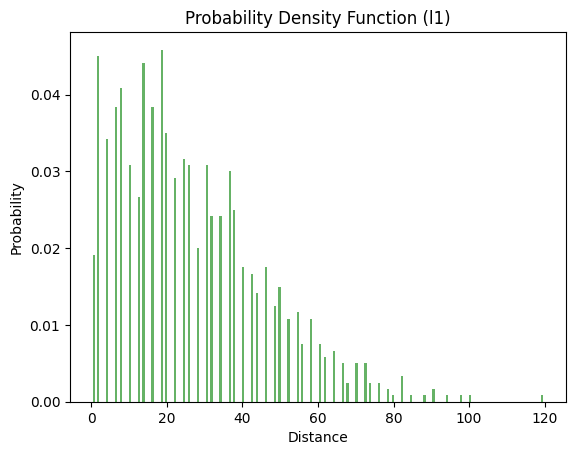

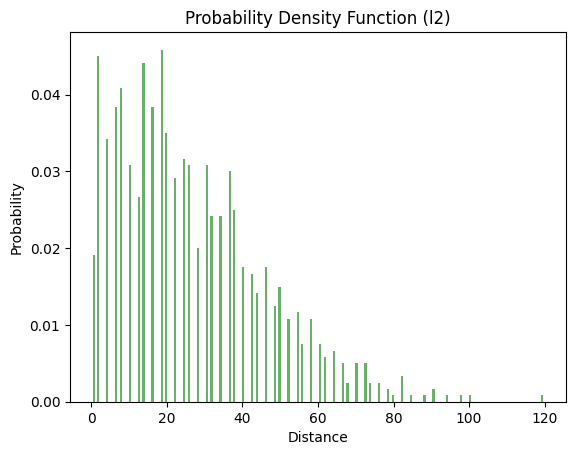

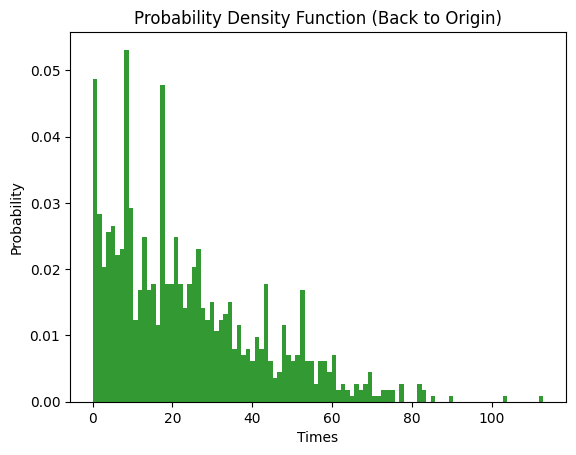

Dimension = 1, n = 10000


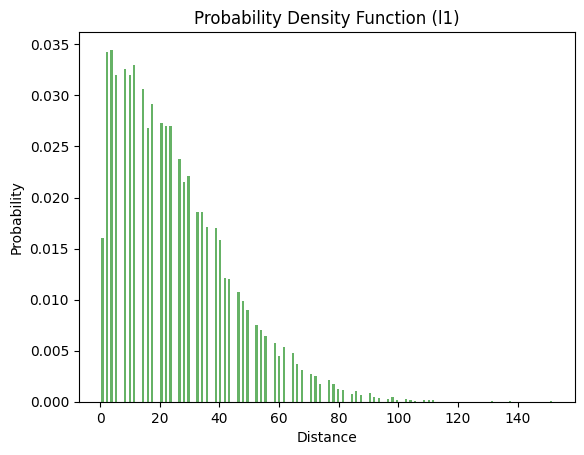

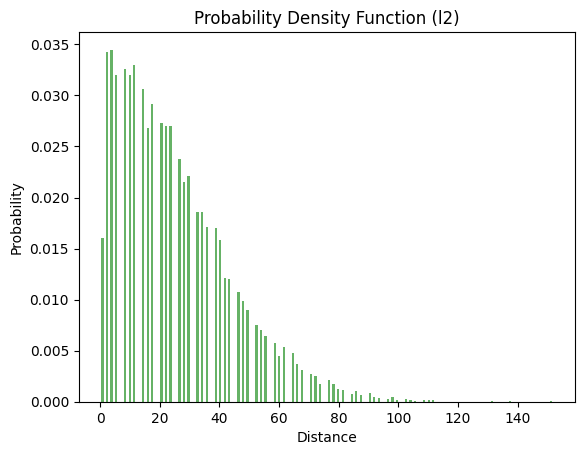

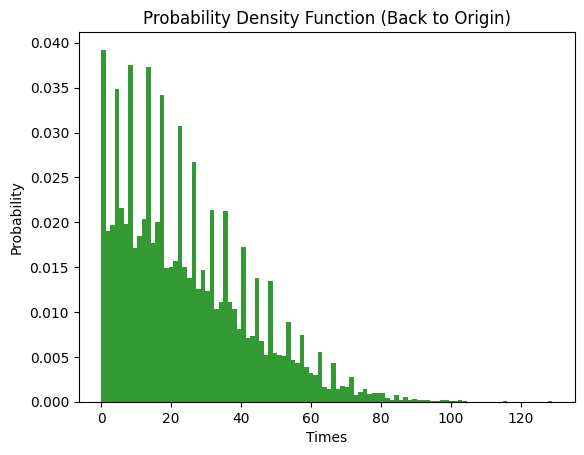

Dimension = 1, n = 100000


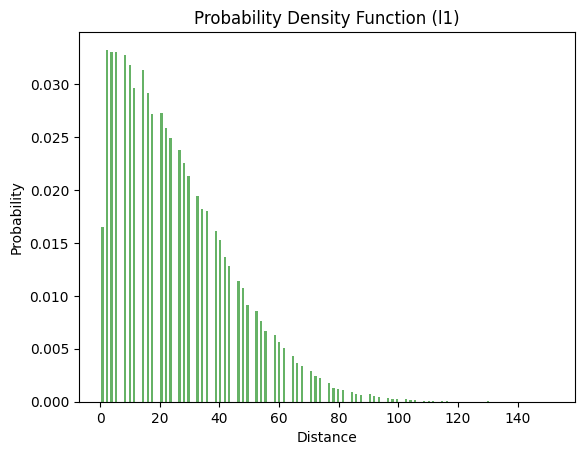

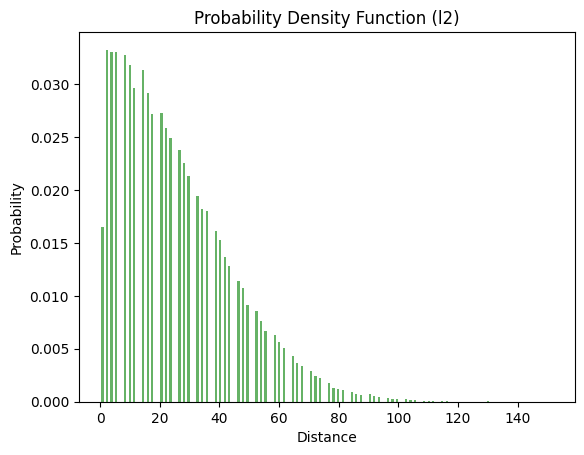

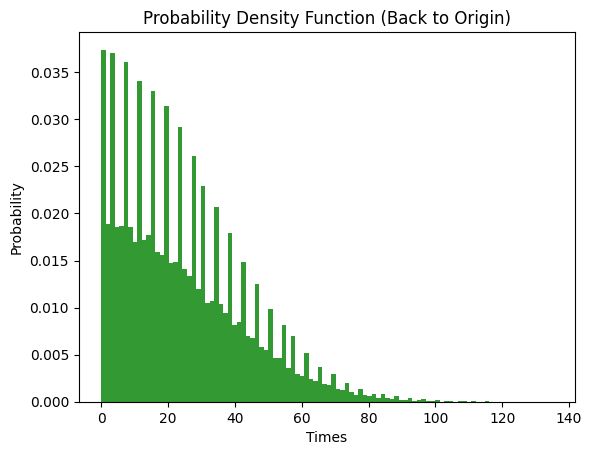

Dimension = 1, n = 1000000


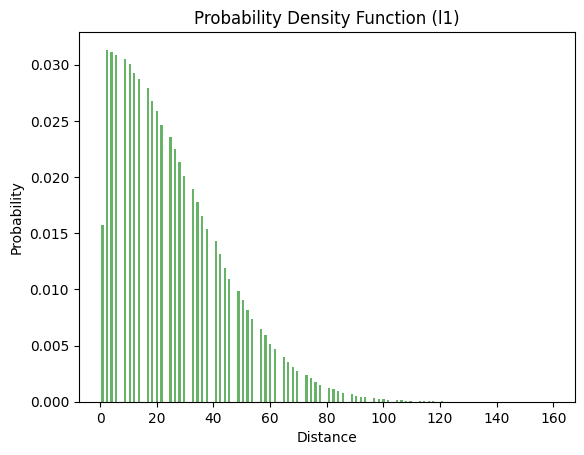

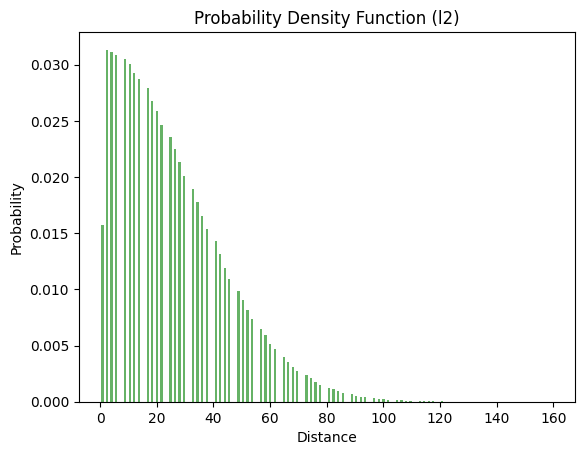

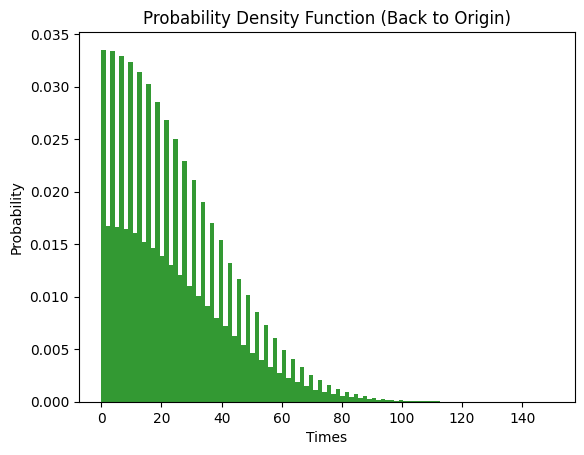

Dimension = 2, n = 100


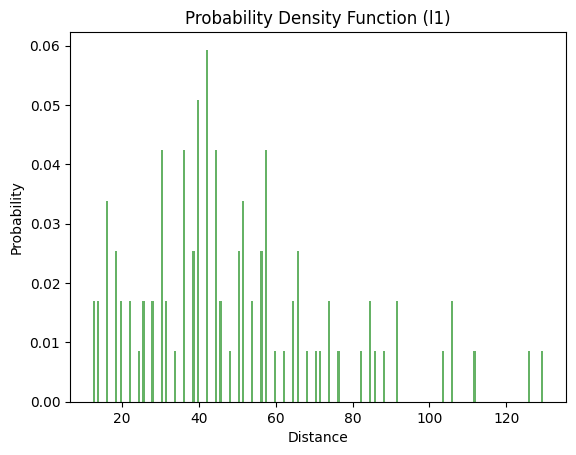

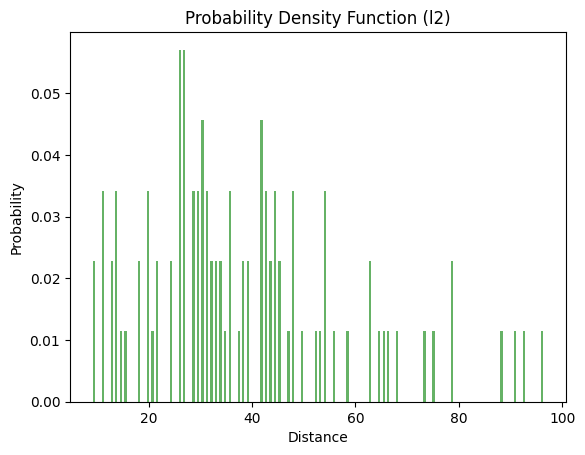

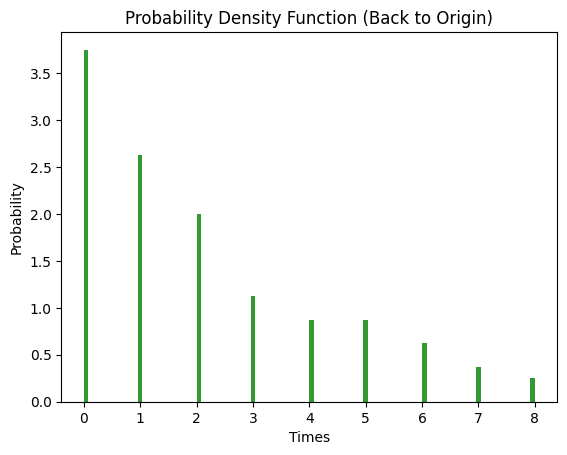

Dimension = 2, n = 1000


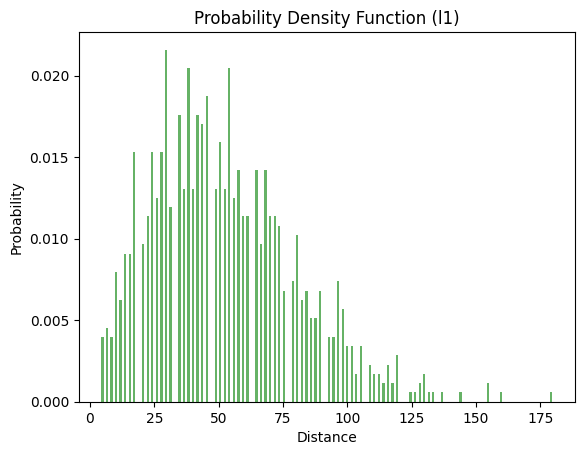

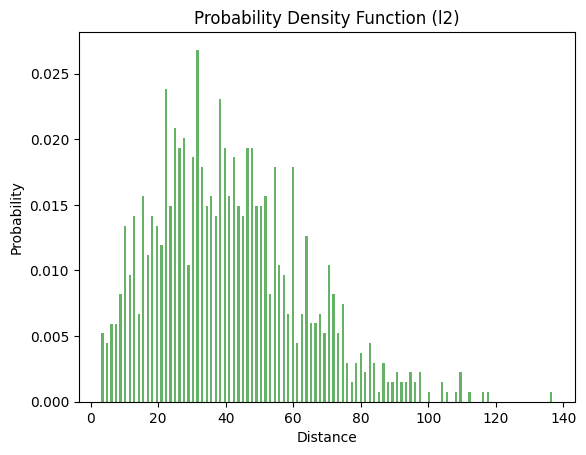

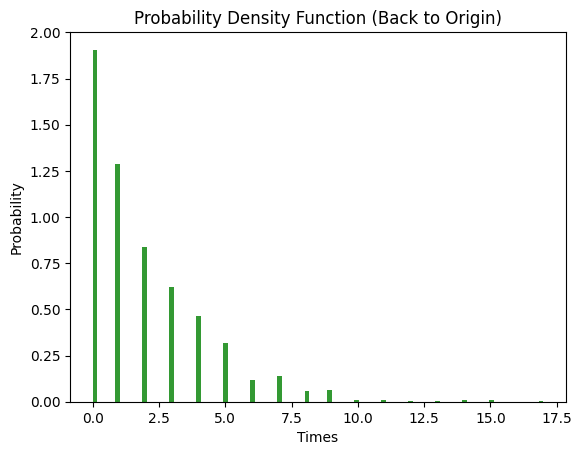

Dimension = 2, n = 10000


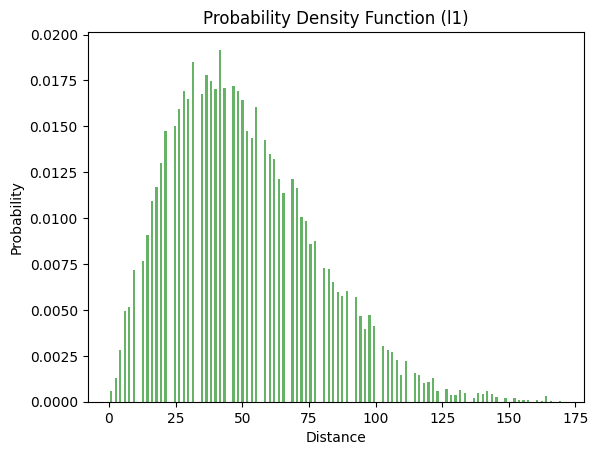

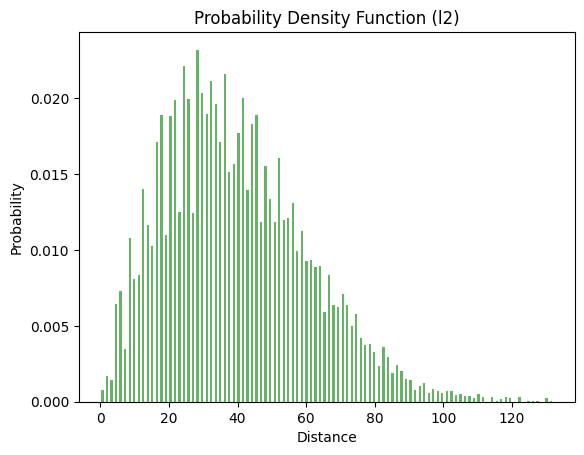

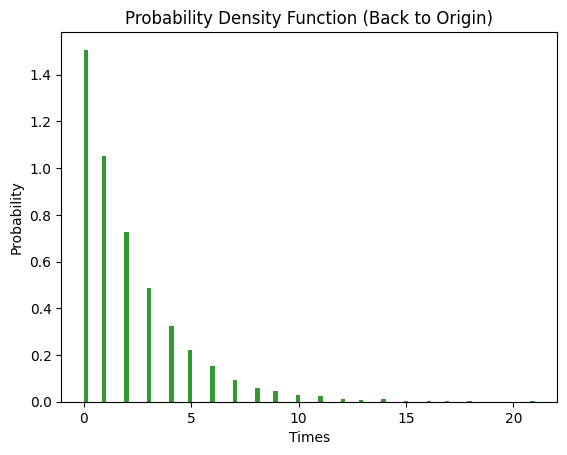

Dimension = 2, n = 100000


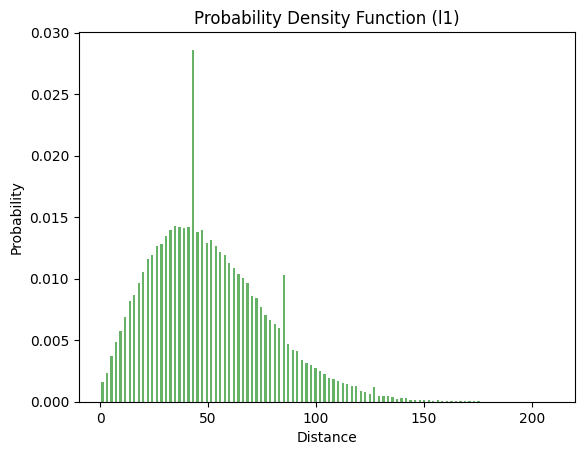

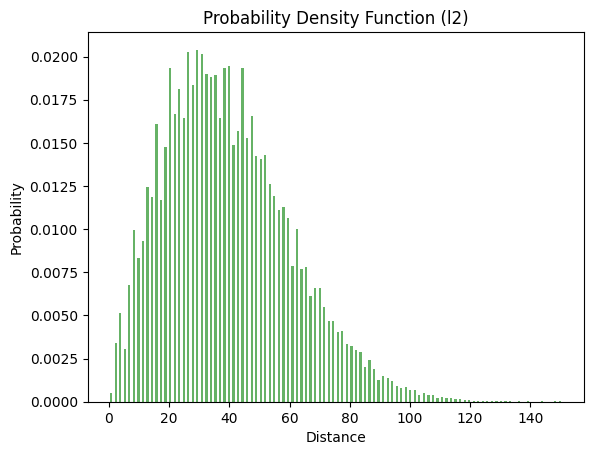

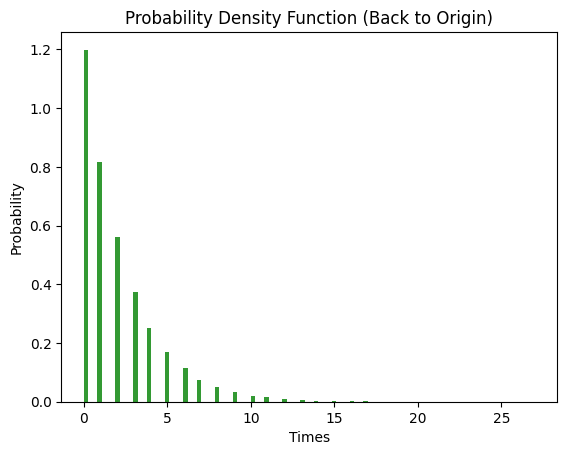

Dimension = 2, n = 1000000


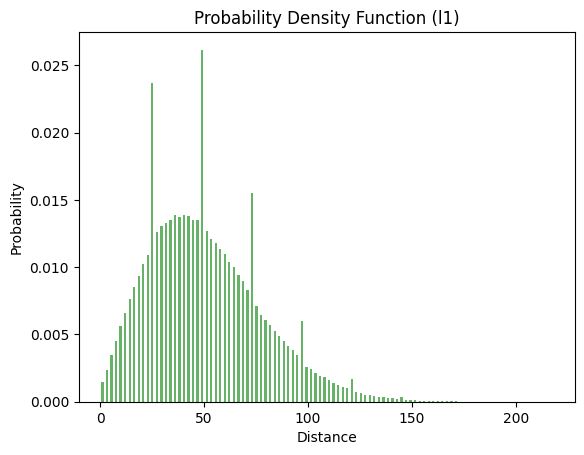

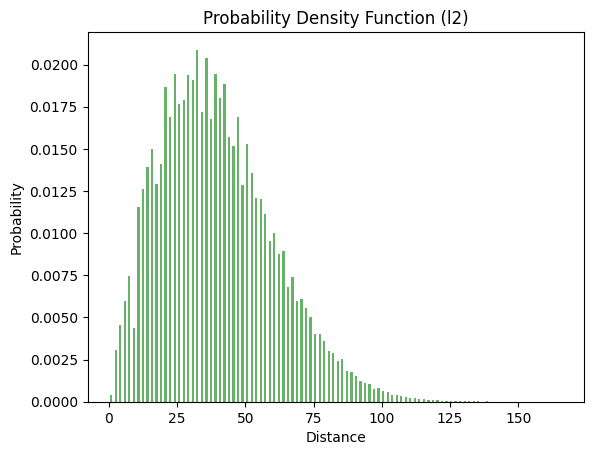

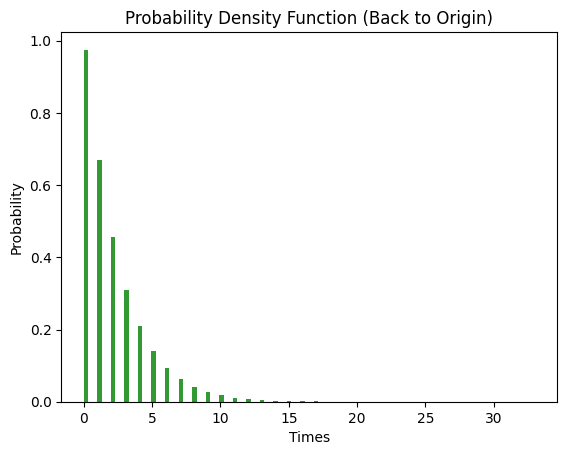

Dimension = 3, n = 100


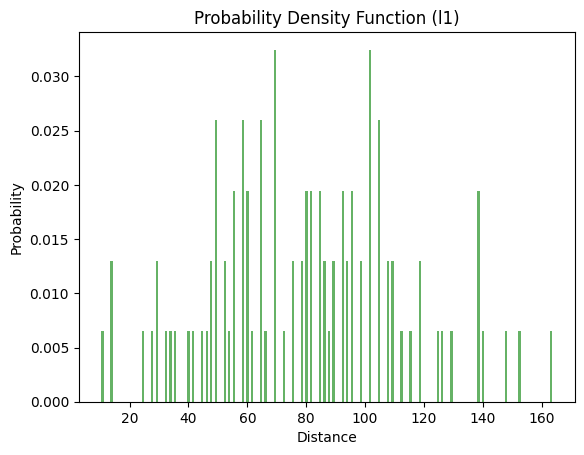

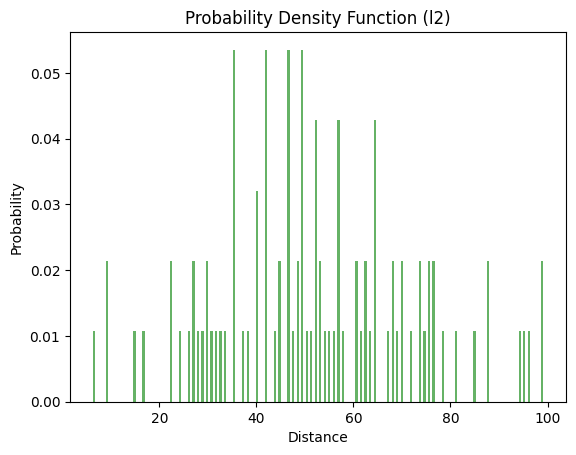

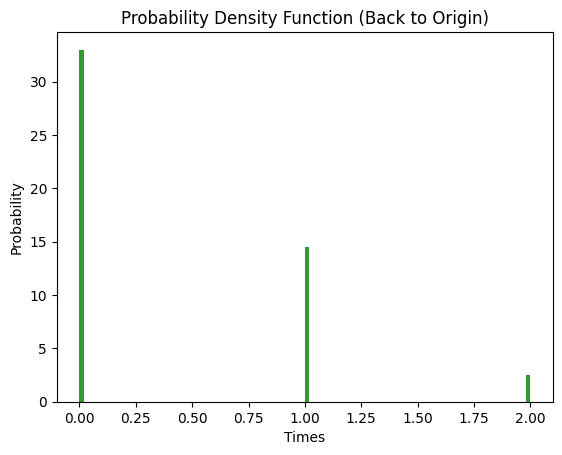

Dimension = 3, n = 1000


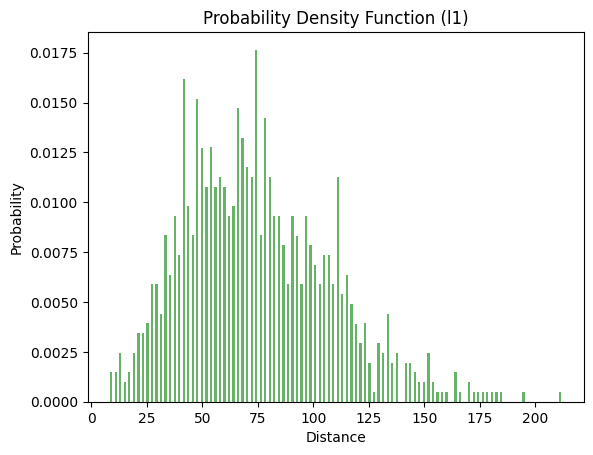

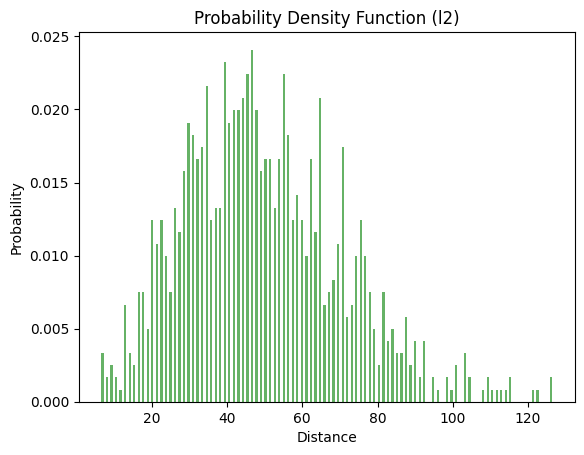

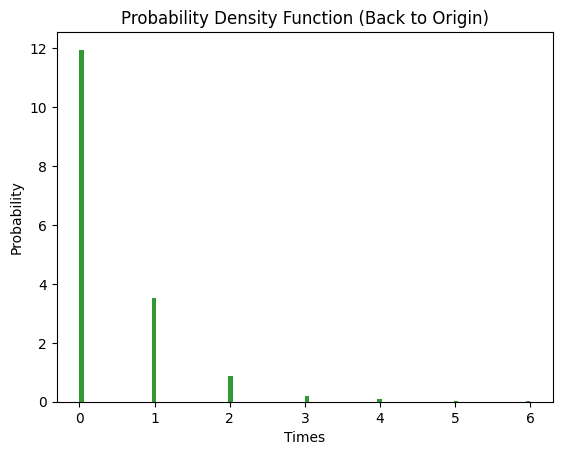

Dimension = 3, n = 10000


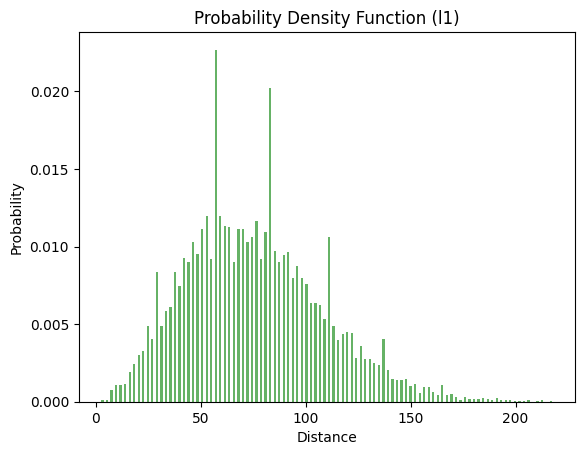

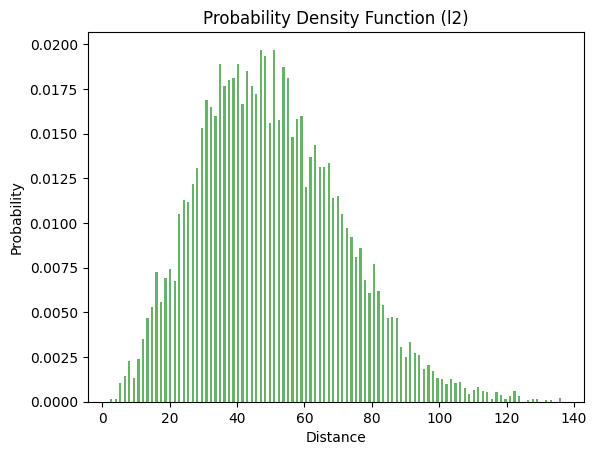

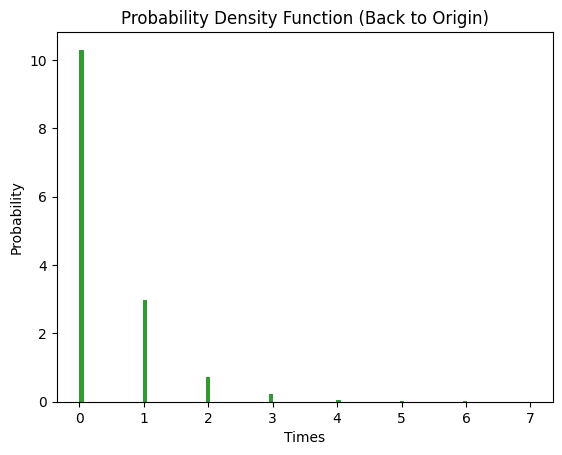

Dimension = 3, n = 100000


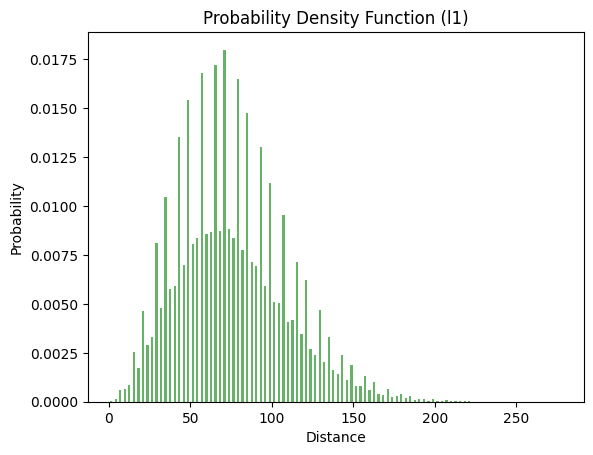

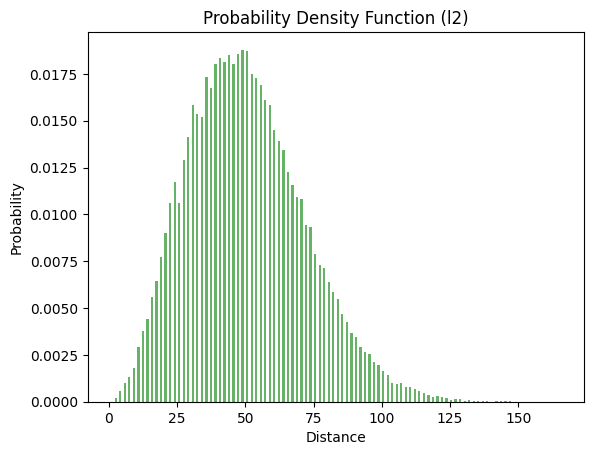

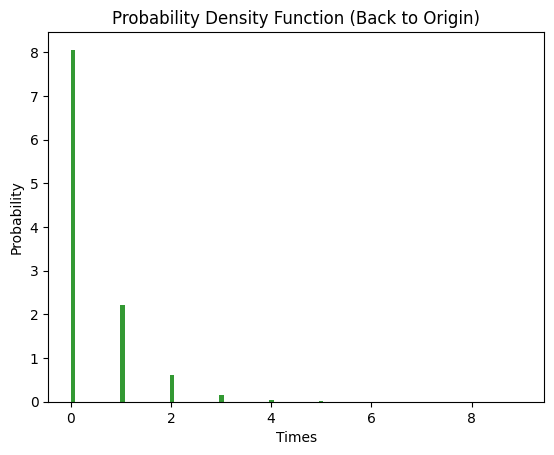

Dimension = 3, n = 1000000


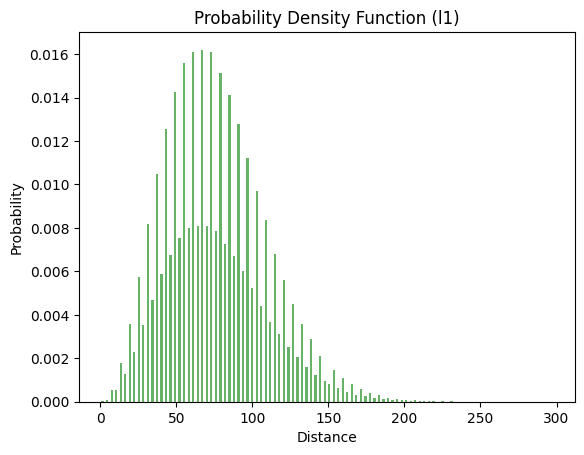

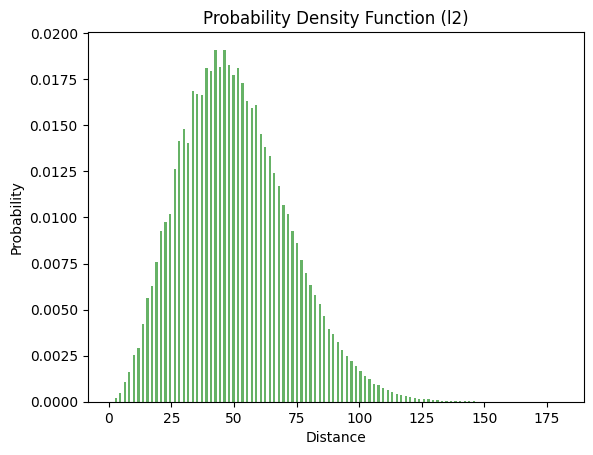

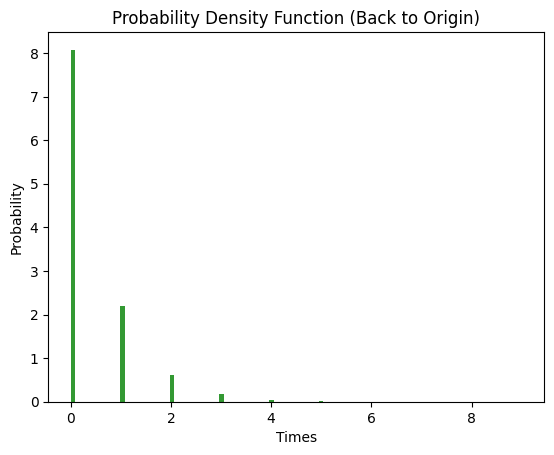

Dimension = 4, n = 100


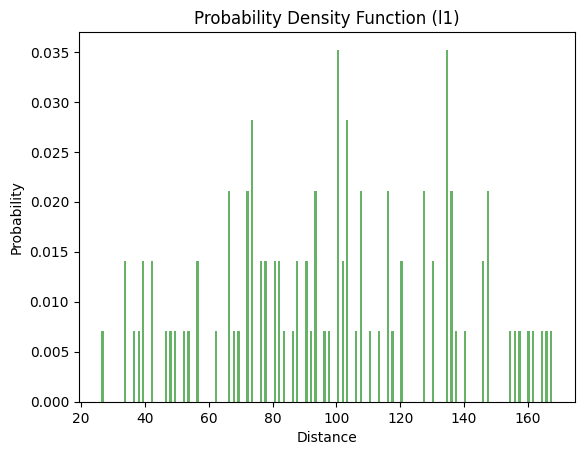

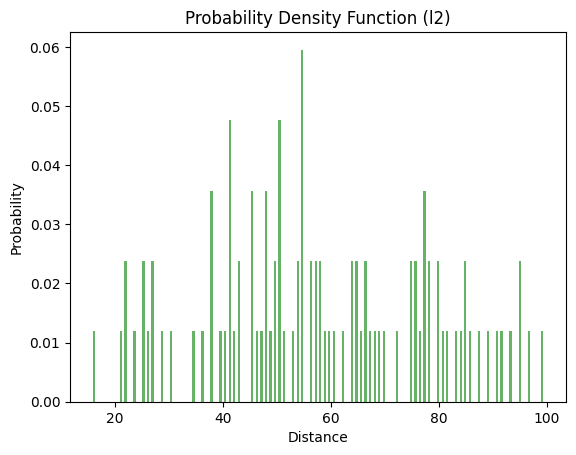

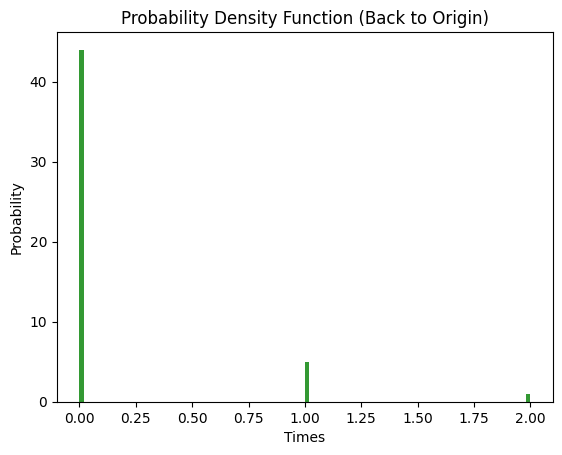

Dimension = 4, n = 1000


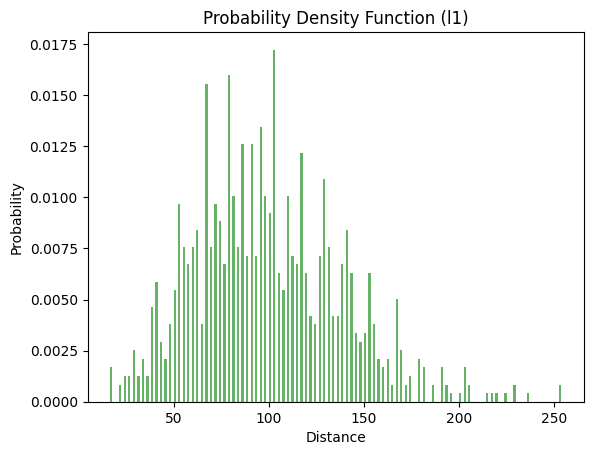

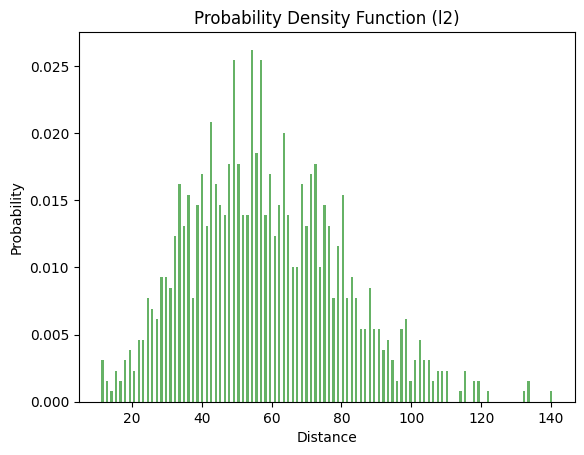

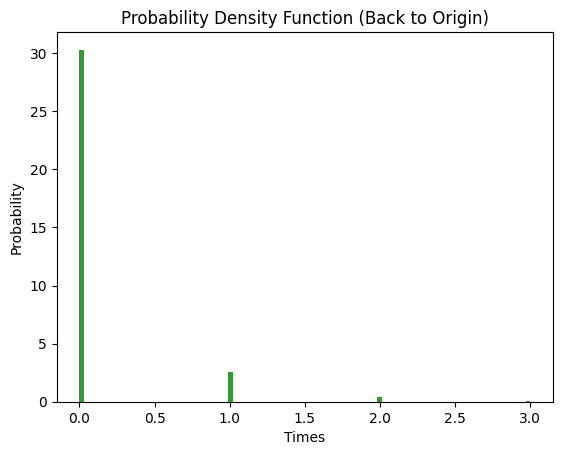

Dimension = 4, n = 10000


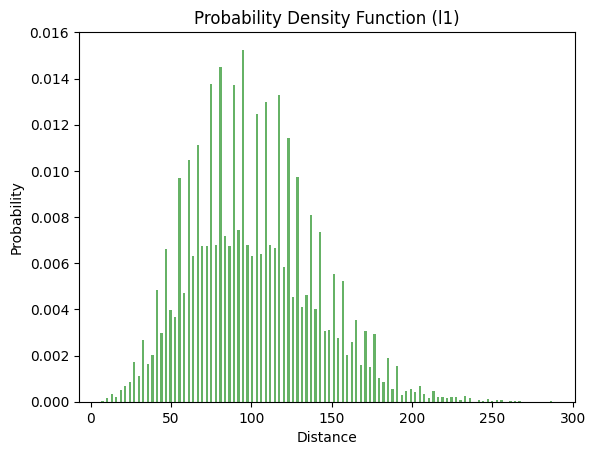

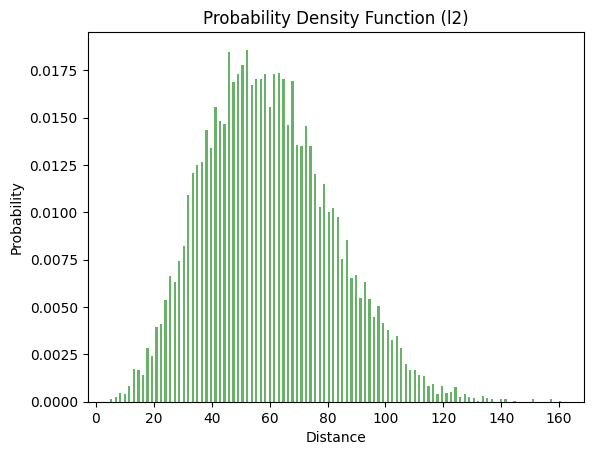

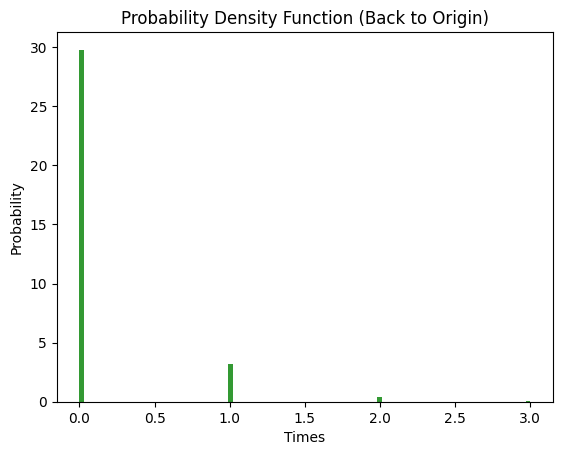

Dimension = 4, n = 100000


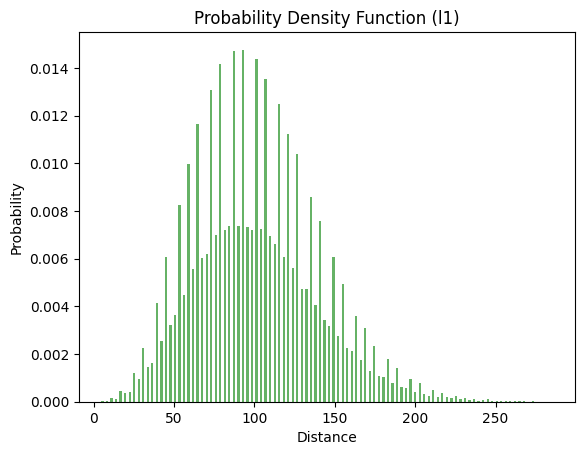

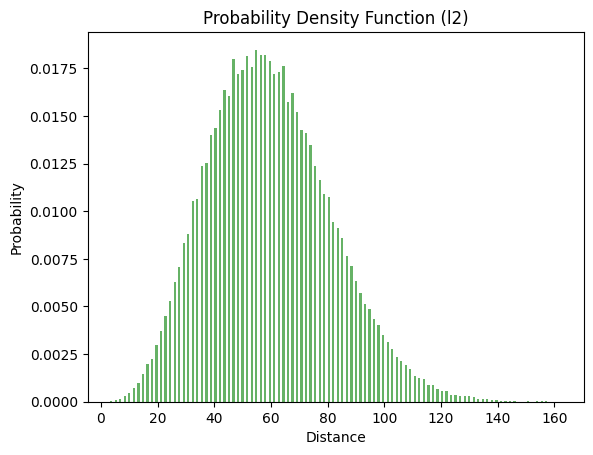

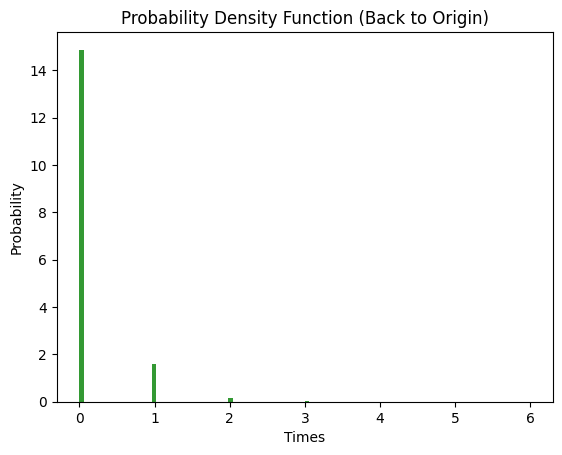

Dimension = 4, n = 1000000


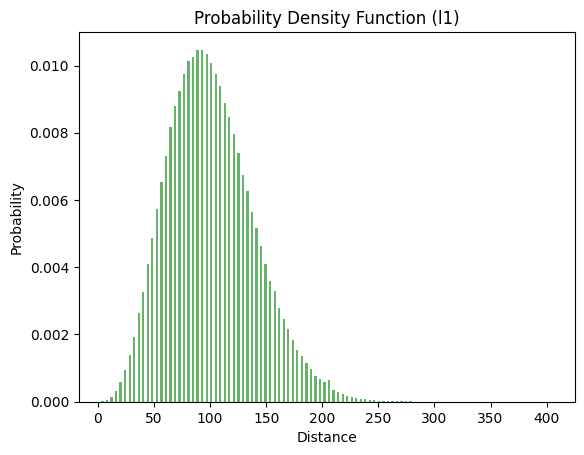

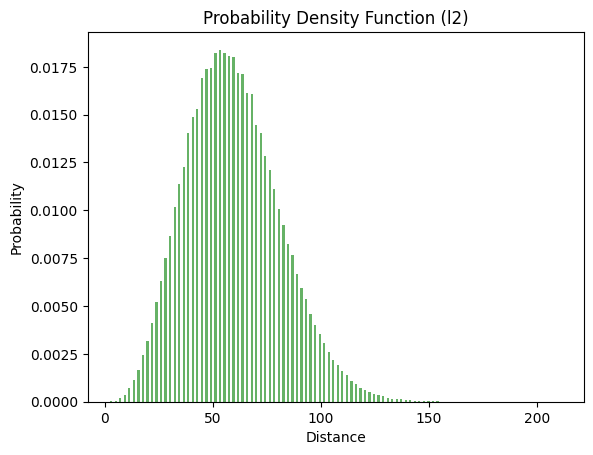

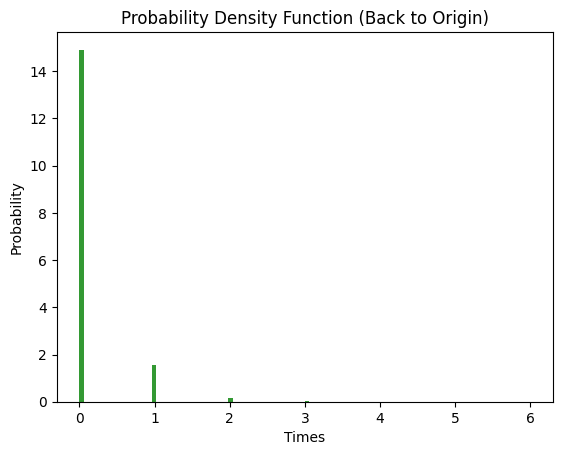

In [12]:
main()